## 합성곱 연산
흑백이미지는 3차원 텐서 (28x28x1)

컬러이미지는 (28x28x3) 3번쨰 차원을 채널이라고 함

합성곱 층(convolution layer)은 신경망 층 구성 방식의 한 종류로써 합성곱 연산을 통해 다음 층에 내보낼 출력값을 계산함

합성곱 연산에는 입력값 및 커널(kernel or filter)이 필요함
> 입력값에 커널을 붙인 후, 커널을 한 칸씩 움직이며, 입력값과 커널이 겹친 공간의 값들을 모두 각 위치끼리 곱해서 더함. 일반적으로 커널은 입력값보다 작은 크기를 갖고 있음

모든 연산을 마치고 나면 아래와 같은 결과값이 나오며, 합성곱 신경망에서 합성곱 결과로 나온 값들을 특징 맵이라고 함

커널은 원하는 만큼 움직일 수 있는데 이렇게 커널이 움직이는 간격을 스트라이드(stride)라고 함

1보다 큰크기의 커널로 합성곱을 진행하면 feature map의 크기가 입력값보다 작아짐

그러나 딥러닝에서는 layer를 충분히 깊게 쌓아야 저레벨 특징점으로부터 고레벨 특징점을 학습할 수 있으므로 feature map 크기가 줄어드는 것은 문제가 될 수 있음>> 만약 합성곱 이후에도 feature map 크기가 동일하다면 원하는 만큼 layer를 쌓을 수 있음

입력값 주변에 값을 두르는 것을 padding이라고 함. 주로0을 사용하지만 상황에 따라 1이나 다른 값도 사용 가능

합성곱 연산을 수행하는 합성곱 층 (convolution layer)을 위주로 이루어진 신경망 구조를 합성 곱 신경망(convolution neural network cnn)이라고 함

합성곱 층의 가중치 및 편향은 mlp에서와는 다른 구조를 보임

합성곱 신경망에서도 맨 마지막에 분류를 담당하는 레이어들은 mlp 형태를 사용함

합성곱 층에서도 편향을 추가할 수 있으며 이 때 편향은 각 커널당 하나의 값이 있음. 해당 커널로부터 생성된 feature map의 모든 요소에 같은 값이 더해짐

3차원 텐서의 합성곱 연산
> 3개의 채널을 가진 컬러이미지로부터 하나의 특징 맵을 만들기 위해 총 3개의 커널이 필요............입력 텐서의 채널 수 만큼의 커널이 있어야 특징 맵 하나를 생성할 수 있음 그리고 다수의 커널을 사용하면 원하는 개수의 채널을 갖는 특징 맵을 생성할 수 있음

pooling이란 주어진 입력값에서 정보를 추출한 후 크기가 줄어든 특징맵을 생성하는 연산의 일종

max pooling, avg pooling이 주로 사용됨

저레벨 특징점들을 바탕으로 더 고레벨의 특징점을 학습하기 위해 필요한 과정. 풀링을 통해 합성곱 신경망은 더 넓은 범위의 이미지를 분석할 수 있게 됨

풀링은 일반적으로 높이 너비가 2인 커널 형태에서 stride2를 적용하여 수행함. 때에 따라 커널 크기 및 stride 조정 가능

합성곱 신경망은 합성곱 층 및 풀링 층을 반복하여 쌓아서 만들어지며 맨 마지막에는 mlp를 이용해 분류 혹은 회귀 등의 작업을 수행함

합성곱과 풀링을 반복하는 신경망에서는 표현 학습을 수행한다고 볼 수 있음 학습된 표현은 mlp에 입력하기 적합한 1차원 형태로 바뀌며 이와 같은 reshape과정을 flatten이라고 함 !!

feature map이 flatten된 뒤의 연산을 담당하는 mlp에서는 본격적인 분류 및 회귀를 수행함

즉 합성곱 신경망은 전통적인 mlp와 더불어 표현학습을 수행하기 위한 합성곱 및 풀링층들을 결합한 것

합성곱 이후에는 feature map에 activation function을 적용함. pooling사용하면 높이 너비가 반으로 줄고 보통 conv, activation, pooling을 엮어서 하나의 layer취급함

최신 합성곱 신경망에서는 대부분 크기 3인 정사각형 커널을 이용한 합성곱을 주로 활용함

더 큰 크기의 커널을 사용하면 한 layer에서 더 넓은 영역을 자세히 분석할 수 있겠지만 크기 3인 커널을 사용하는 layer를 여러번 중첩하는 것이 더 적은 파라미터로 유사한 성능을 낼 수 있음

pooling을 수행하면 데이터 양이 1/4로 줄어들게 되므로 정보손실을 완화하기 위해서 pooling 이후의 합성곱 연산 시에는 채널을 2배로 늘려주는 것이 일반적이다 ~

합성곱 연산들을 통해 표현 학습을 충분하게 수행한 후에는 mlp를 이용해 분류 작업 수행

mlp를 구성하는 layer들은 뉴런 사이의 모든 연결에 대해 가중치가 존재하므로 fully connected layer, fc layer라고 함



In [1]:
"""
t.nn.Conv2d(in_channels, out_channels, kernal_size, stride=1, padding=0)
#사용 예시
nn.Conv2d(3, 64, kernal_size=5, stride=2, padding=0)
kernal_size에 int형 2개로 이루어진 튜플을 입력하면 각각 height, width를 의미함

max pooling 층은
t.nn.MaxPool2d(kernal_size, stride=None, padding=0, dilation=1)
가장 널리 사용하는 kernal size 2, stride 2면
nn.MaxPool2D(2,stride=2)
"""
import torch as t
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = t.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = t.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(777)
t.manual_seed(777)
if device == 'cuda':
    t.cuda.manual_seed_all(777)

다음 기기로 학습합니다: cuda


In [7]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    #첫 번째 층
    self.layer1=nn.Sequential( #(28,28,1)
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), #(28,28,32)
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #(14,14,32)
    )
    #두 번째 층
    self.layer2=nn.Sequential(
        nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1), #(14, 14, 64)
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #(7,7,64)
    )
    #전결합층
    self.fc=nn.Sequential(
        nn.Linear(7*7*64,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )

  def forward(self, x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.view(out.size(0), -1)
    out=self.fc(out)
    return out

In [13]:
#hyperparameters
training_epochs=3
batch_size=100

#MNIST datasets
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

#dataset loader
data_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True)

#CNN 객체 생성
model=CNN().to(device)
criterion=nn.CrossEntropyLoss().cuda()
optimizer=t.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(training_epochs):
  avg_cost=0
  total_batch=len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train=x_train.to(device)
    y_train=y_train.to(device)

    outputs=model(x_train)
    cost=criterion(outputs, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('Epoch:', '%04d'% (epoch+1), 'cost= ', '{:.9f}'.format(avg_cost))

print('따란')

Epoch: 0001 cost=  0.172389582
Epoch: 0002 cost=  0.062802501
Epoch: 0003 cost=  0.052174624
따란


In [16]:
with t.no_grad():
  x_test=mnist_test.data.view(len(mnist_test), 1,28,28).float().to(device)
  y_test=mnist_test.targets.to(device)

  prediction=model(x_test)
  correct_prediction=t.argmax(prediction,1)==y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy: ', accuracy.item())

Accuracy:  0.9268999695777893


특정 합성층 곱에서 필요한 가중치 개수

커널 사이즈(가로*세로)x입력채널수x특징점맵의 채널수(커널 수)

특정 합성곱 층에서 필요한 편향 개수

입력채널수x특징점맵의 채널수 (Ci*Co) 이건 커널 수랑 같음

## LeNet-5
MNIST 데이터셋 해결에 널리 활용되었고 합성곱 신경망의 시초격. avg pooling적용했고 활성 함수는 대부분 layer에서 tanh 적용

## AlexNet
2012이미지넷 대회(이미지 분류 경진대회)에서 우승한 모델

과적합 막기 위한 두 가지 규제(regularization) 기법을 사용함

전결합층에 드롭아웃 적용: 드롭아웃은 매 iteration마다 랜덤으로 일정비율의 뉴런을 비활성화하고 학습시킴. 일반적으로 머신러닝에서 과적합은 데이터셋 크기에 비해서 학습시켜야할 매개변수들이 많을 때 잘 발생함. 드롭아웃에서는 더 적은 개수의 뉴런으로도 원하는 답을 얻을 수 있도록 유도하여 과적합을 예방

데이터 증강(data augmentation) 기법을 적용함: 주어진 학습 데이터셋에 대해 각 데이터의 본질을 유지하는 특정 변환들을 가해 새로운 형태의 데이터를 만들어내는 기법

## VGGNet
얘도 이미지넷 대회에서 어쩌구.. 단순하고 효과적인 구조로 현재까지도 CV에서 가장 기초적인 CNN구조로 활용되고 있음

VGGNet에서 처음으로 크기3의 커널로 여러번 합성곱을 진행하면 크기가 큰 커널을 쓸 때보다 더 적은 가중치로도 유사하거나 오히려 더 좋은 성능을 보인다는 것을 밝히고 실제 성능으로 입증함

16개의 layer를 갖는 버전, 19개의 layer를 갖는 버전 두 가지가 존대

pooling 이후에 채널 수를 2배 늘리는 것도 VGGNet 이후부터 딥러닝 연구자들 사이에 널리 정착된 개념으로 볼 수 있음

##  GoogLeNet
다양한 크기의 커널로 합성곱을 진행한 후 이를 이어서 다음 층으로 넘기는 inception layer라는 층 구조를 제안함

inception layer가 시작되기 전에 일반적인 형태의 conv-pool을 반복하는 구간을 stem layer라고 칭하고 특히 첫번째 layer에서는 큰 사이즈의 커널과 stride 2를 적용해 입력 이미지 크기를 대폭 줄여줌

이미지 분류 문제에서 너무 저레벨의 특징은 분석해도 큰 도움이 되지 않기 때문에 feature map을 적절한 크기로 단번에 줄여준다고 볼 수 있으며 GoogLeNet 이후의 다양한 신경만 구조에서도 stem layer를 적용하고 있음

처음으로 global average pooling(GAP)라는 개념을 도입함

마지막 풀링이 끝난 후 전결합층이 시작되기 전에는 일반적으로 flatten을 진행했으며 이후 다음 전결합층과 연결되는데 필요한 가중치가 많아서 마지막 feature map들을 같은 크기의 커널로 avg pooling 함으로써 1차원 feature을 만들어내는 GAP가 제안되었고 이후 널리 활용되엇다

## ResNet

152개의 층으로 구성되어있음............. 충분히 깊은 층이 성능 확보에 꼭 필요하다는 것을 깨닫게 됨

근데 ResNet이전에는 연구자들이 층을 더 쌓다가 일정 이상이 되면 오히려 성능이 떨어졌음

>특정 신경망이 있을 때 입력을 그대로 출력으로 내보내는 identity연산을 수행하는 layer들을 추가해서 성능이 같고 더 깊은 신경망을 만들수 있었음. 따라서 더 깊은 네트워크는 이론상 더 얕은 네트워크의 성능 이상이 나와야 함 >> 각 layer에서 identity 연산을 쉽게 학습할 수 있다면 깊은 네트워크를 잘 학습시킬 수 있음

일반적인 신경망의 경우 identity 연산을 수행하는 커널값을 학습하려면 크기 3인 커널 기준으로 중간은 1 나머지는 0

그러나 보통 가중치를 초기화할 땐 정규분포와 유사한 분포에서 값을 샘플링하여 사용함 따라서 확률적으로 거의 0에 가까운 값들이 나오게 됨.... 즉 커널의 최종값이 중간만 1이고 나머지는 0으로 학습되는 것은 초기 상태와 매우 달라서 학습이 어렵다고 할 수 있음

합성곱 한 번은 기존 신경망들처럼 수행하지만 두 번째 합성곱 이후에는 예전의 feature map값을 더 가져와서 더한 뒤 activation을 수행함,. 따라서 가중치들이 다 0이면 해당 layer의 출력값은 x가 되고 입력이 그대로 출력으로 나가게 되니 identity연산이 됨> 가중치 초기값들은 0에 가까울수록 확률이 높으므로 모두 최종값 0으로 학습되는 것은 매우 쉬움

ResNet은 VGGNet의 크기3합성곱, GooLeNet의 stem,GAP 모두 적용 ~~

## EfficientNet
신경망의 과적합을 막기 위한 다양한 방안들이 제안되고 도입된 후 CV연구자들은
1. 신경망을 더 넓게 구성(채널 수 증가)
2. 신경망을 더 깊게 쌓기
3. 입력 크기를 늘려주면

성능이 증가한다는 것을 실험적으로 알고 있었음

하지만 신경망의 크기(총 매개변수 수)를 제한했을 때 채널수 층 수 입력크기를 어떻게 조율해야 최적의 성능을 낼 수 있는지는 그동안 제대로 연구된 바 없었음

따라서 해당 연구에서는 제한된 신경망 크기 내에서 최고의 성능을 달성하는 것을 목표로 연구를 진행함

가장 기본이 되는 구조인 EfficientNet-B0를 만든 후 최적의 채널 수 증가 비율 층 수 증가 비율 입력 크기 증가 비율을 다양한 실험을 통해 확정하여 점점 더 큰 신경망인 B!~B7까지를 제안

## 전이학습
다른 데이터셋에 대해 먼저 학습된 신경망의 가중치를 새로운 데이터셋에 대해 학습하기 위한 신경망의 가중치 초기값으로 사용하는 학습 방식을 전이 학습

ImageNet Dataset 이걸로 학습된 모델들은 컴퓨터 비전 분야에서 전이학습에 가장 활발히 사용되고 있음

새로운 데이터셋에서는 클래스 개수가 달라지므로 신경망 맨 마지막의 층은 새로 만들어주어야 ~

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
import os as os
os.getcwd()

'/content'

In [8]:
#압축해제
!unzip ants_bees.zip

Archive:  ants_bees.zip
   creating: ants_bees/train/
   creating: ants_bees/train/ants/
  inflating: ants_bees/train/ants/0013035.jpg  
  inflating: ants_bees/train/ants/1030023514_aad5c608f9.jpg  
  inflating: ants_bees/train/ants/1095476100_3906d8afde.jpg  
  inflating: ants_bees/train/ants/1099452230_d1949d3250.jpg  
  inflating: ants_bees/train/ants/116570827_e9c126745d.jpg  
  inflating: ants_bees/train/ants/1225872729_6f0856588f.jpg  
  inflating: ants_bees/train/ants/1262877379_64fcada201.jpg  
  inflating: ants_bees/train/ants/1269756697_0bce92cdab.jpg  
  inflating: ants_bees/train/ants/1286984635_5119e80de1.jpg  
  inflating: ants_bees/train/ants/132478121_2a430adea2.jpg  
  inflating: ants_bees/train/ants/1360291657_dc248c5eea.jpg  
  inflating: ants_bees/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: ants_bees/train/ants/1473187633_63ccaacea6.jpg  
  inflating: ants_bees/train/ants/148715752_302c84f5a4.jpg  
  inflating: ants_bees/train/ants/1489674356_09d48dde0a.jpg 

In [2]:
#matplotlib 환경설정
%matplotlib inline

In [3]:
# License: BSD
# Author: Sasank Chilamkurthy

#필요 라이브러리 import
from __future__ import print_function, division

import torch as t
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # 대화형 모드

In [9]:
#데이터 증강 및 정규화
data_transforms={
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ])
}

#ImageFolder 기능을 활용한 Pytorch 데이터셋, 데이터로더 생성
data_dir='ants_bees'

image_datasets={x: torchvision.datasets.ImageFolder(os.path.join(data_dir,x),
                                          data_transforms[x])
  for x in ['train','val']}
dataloaders={x: t.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                        shuffle=True, num_workers=4)
for x in ['train', 'val']}
dataset_sizes={x:len(image_datasets[x]) for x in ['train','val']}
class_names =image_datasets['train'].classes

device=t.device('cuda:0' if t.cuda.is_available() else 'cpu')

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


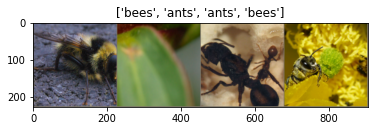

In [10]:
# 데이터셋 랜덤 샘플링, 시각화
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  


# train data 배치하고
inputs, classes = next(iter(dataloaders['train']))

# 배치를 격자 형태로
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [42]:
def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    t_accuracy=[]
    v_accuracy=[]

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # epoch마다 train val train val train val
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # 모델을 학습 모드로 설정
            else:
                model.eval()   # 모델을 평가 모드로 설정

            running_loss = 0.0
            running_corrects = 0

            # 미니 배치 학습 루프
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # 순전파
                # 학습 시에만 연산 기록을 추적
                with t.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = t.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 학습 단계인 경우 역전파 + 최적화
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계
                running_loss += loss.item() * inputs.size(0)
                running_corrects += t.sum(preds == labels.data)


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
              t_accuracy.append(epoch_acc.item())
            else:
              v_accuracy.append(epoch_acc.item())
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # 모델을 깊은 복사(deep copy)함
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
    plt.plot(t_accuracy, color='lightcoral')
    plt.plot(v_accuracy, color='cornflowerblue')
    plt.legend(['train','val'], loc='upper left')
    plt.show()

    # 가장 나은 모델 가중치를 불러옴
    model.load_state_dict(best_model_wts)

    return model

Epoch 0/9
----------
train Loss: 0.7971 Acc: 0.5410
val Loss: 0.8185 Acc: 0.5817

Epoch 1/9
----------
train Loss: 0.7475 Acc: 0.5779
val Loss: 0.7596 Acc: 0.6078

Epoch 2/9
----------
train Loss: 0.7023 Acc: 0.6516
val Loss: 1.0131 Acc: 0.5621

Epoch 3/9
----------
train Loss: 0.8159 Acc: 0.5451
val Loss: 0.6458 Acc: 0.6601

Epoch 4/9
----------
train Loss: 0.7013 Acc: 0.6352
val Loss: 0.6106 Acc: 0.6928

Epoch 5/9
----------
train Loss: 0.7447 Acc: 0.6148
val Loss: 0.6533 Acc: 0.6536

Epoch 6/9
----------
train Loss: 0.6660 Acc: 0.6639
val Loss: 0.6330 Acc: 0.7059

Epoch 7/9
----------
train Loss: 0.6549 Acc: 0.6352
val Loss: 0.5761 Acc: 0.6667

Epoch 8/9
----------
train Loss: 0.7772 Acc: 0.6311
val Loss: 0.6877 Acc: 0.6863

Epoch 9/9
----------
train Loss: 0.7286 Acc: 0.6148
val Loss: 0.6574 Acc: 0.6863

Training complete in 0m 43s
Best val Acc: 0.705882


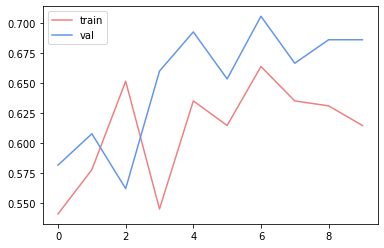

In [45]:
#미리 학습된 가중치를 불러오고 싶으면 pretrained=True
#ResNet18 가중치 초기화 후 학습
model_ft=models.resnet18(pretrained=False, num_classes=2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

Epoch 0/9
----------
train Loss: 1.0206 Acc: 0.5082
val Loss: 1.5105 Acc: 0.5686

Epoch 1/9
----------
train Loss: 0.7361 Acc: 0.5410
val Loss: 0.7687 Acc: 0.4706

Epoch 2/9
----------
train Loss: 0.7269 Acc: 0.5615
val Loss: 0.7599 Acc: 0.5229

Epoch 3/9
----------
train Loss: 0.7429 Acc: 0.5123
val Loss: 0.6943 Acc: 0.4967

Epoch 4/9
----------
train Loss: 0.7297 Acc: 0.5820
val Loss: 0.8486 Acc: 0.5425

Epoch 5/9
----------
train Loss: 0.7056 Acc: 0.5451
val Loss: 0.7331 Acc: 0.4967

Epoch 6/9
----------
train Loss: 0.7028 Acc: 0.5697
val Loss: 0.7183 Acc: 0.4837

Epoch 7/9
----------
train Loss: 0.7058 Acc: 0.5451
val Loss: 0.7772 Acc: 0.5163

Epoch 8/9
----------
train Loss: 0.6685 Acc: 0.6393
val Loss: 0.7540 Acc: 0.5294

Epoch 9/9
----------
train Loss: 0.6601 Acc: 0.6475
val Loss: 0.7190 Acc: 0.7255

Training complete in 0m 48s
Best val Acc: 0.725490


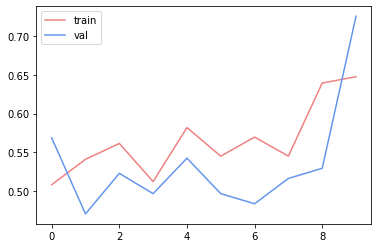

In [46]:
#걍 adam으로도 해봄
model_ft=models.resnet18(pretrained=False, num_classes=2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.Adam(model_ft.parameters(), lr=0.001)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/9
----------
train Loss: 0.4955 Acc: 0.7213
val Loss: 0.2474 Acc: 0.9085

Epoch 1/9
----------
train Loss: 0.5870 Acc: 0.7582
val Loss: 0.2309 Acc: 0.9216

Epoch 2/9
----------
train Loss: 0.7394 Acc: 0.7254
val Loss: 0.3382 Acc: 0.8497

Epoch 3/9
----------
train Loss: 0.4774 Acc: 0.7951
val Loss: 0.3970 Acc: 0.8497

Epoch 4/9
----------
train Loss: 0.4658 Acc: 0.8361
val Loss: 0.3278 Acc: 0.8758

Epoch 5/9
----------
train Loss: 0.4697 Acc: 0.8115
val Loss: 0.5143 Acc: 0.8366

Epoch 6/9
----------
train Loss: 0.7809 Acc: 0.7254
val Loss: 0.3274 Acc: 0.8954

Epoch 7/9
----------
train Loss: 0.5972 Acc: 0.7828
val Loss: 0.2178 Acc: 0.9085

Epoch 8/9
----------
train Loss: 0.6038 Acc: 0.7910
val Loss: 0.5696 Acc: 0.7778

Epoch 9/9
----------
train Loss: 0.5500 Acc: 0.8320
val Loss: 0.5234 Acc: 0.8562

Training complete in 0m 47s
Best val Acc: 0.921569


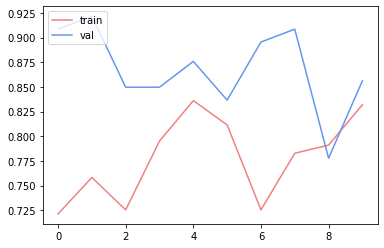

In [47]:
"""
가중치 불러올 때는 이미지넷에서 학습된 버전이라 클래스 개수 1000개 고정
클래스 개수 다르면 모델 생성 후 마지막 결합층을 다시 선언해야돼 ~~
"""

#ResNet 전이 학습
model_ft=models.resnet18(pretrained=True)
num_ftrs=model_ft.fc.in_features
model_ft.fc=nn.Linear(num_ftrs, 2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6377 Acc: 0.6434
val Loss: 0.4710 Acc: 0.7974

Epoch 1/9
----------
train Loss: 0.5143 Acc: 0.7664
val Loss: 0.3621 Acc: 0.8693

Epoch 2/9
----------
train Loss: 0.4228 Acc: 0.8361
val Loss: 0.3190 Acc: 0.8627

Epoch 3/9
----------
train Loss: 0.4341 Acc: 0.8115
val Loss: 0.2596 Acc: 0.9346

Epoch 4/9
----------
train Loss: 0.4002 Acc: 0.8238
val Loss: 0.2404 Acc: 0.9216

Epoch 5/9
----------
train Loss: 0.4284 Acc: 0.7705
val Loss: 0.2347 Acc: 0.9150

Epoch 6/9
----------
train Loss: 0.3473 Acc: 0.8443
val Loss: 0.2199 Acc: 0.9346

Epoch 7/9
----------
train Loss: 0.3089 Acc: 0.8566
val Loss: 0.1931 Acc: 0.9477

Epoch 8/9
----------
train Loss: 0.3787 Acc: 0.8115
val Loss: 0.2051 Acc: 0.9412

Epoch 9/9
----------
train Loss: 0.3105 Acc: 0.8648
val Loss: 0.1945 Acc: 0.9412

Training complete in 0m 42s
Best val Acc: 0.947712


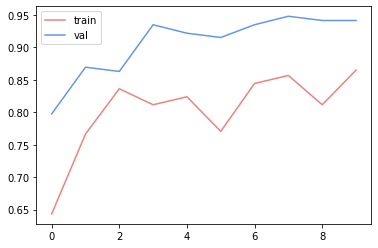

In [48]:
#ResNet 전이 학습 adam도 해봄
model_ft=models.resnet18(pretrained=True)
num_ftrs=model_ft.fc.in_features
model_ft.fc=nn.Linear(num_ftrs, 2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(), lr=0.001)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

In [41]:
#EfficientNetV2 가중치 초기화하고 ~~~
model_ft=models.efficientnet_v2_s(pretrained=False, num_classes=2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 0/9
----------


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train Loss: 4.1116 Acc: 0.5041
val Loss: 438.1894 Acc: 0.3856

Epoch 1/9
----------
train Loss: 1.9087 Acc: 0.4713
val Loss: 14.0766 Acc: 0.5817

Epoch 2/9
----------
train Loss: 1.6423 Acc: 0.4754
val Loss: 45.5675 Acc: 0.4444

Epoch 3/9
----------
train Loss: 1.3821 Acc: 0.4959
val Loss: 20.6683 Acc: 0.5294

Epoch 4/9
----------
train Loss: 1.2342 Acc: 0.5410
val Loss: 49.6993 Acc: 0.5294

Epoch 5/9
----------
train Loss: 1.2741 Acc: 0.5328
val Loss: 7.4614 Acc: 0.5556

Epoch 6/9
----------
train Loss: 1.2186 Acc: 0.4672
val Loss: 8.8021 Acc: 0.5752

Epoch 7/9
----------
train Loss: 1.2535 Acc: 0.5041
val Loss: 6.5466 Acc: 0.5948

Epoch 8/9
----------
train Loss: 1.1139 Acc: 0.5287
val Loss: 17.7100 Acc: 0.6013

Epoch 9/9
----------
train Loss: 1.0923 Acc: 0.5369
val Loss: 7.5848 Acc: 0.4967

Training complete in 1m 31s
Best val Acc: 0.601307


In [42]:
"""
EfficientNetV2는 classifier라는 이름의 마지막 전결합층이 있어
거기에 dropout 제외하고 새로만들게
"""
#EfficientNetV2 전이 학습
model_ft=models.efficientnet_v2_s(pretrained=True)
num_ftrs=model_ft.classifier[1].in_features
model_ft.classifier=nn.Linear(num_ftrs, 2)
model_ft=model_ft.to(device)

criterion=nn.CrossEntropyLoss()
optimizer_ft=optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

model_ft=train_model(model_ft, criterion, optimizer_ft, num_epochs=10)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth


  0%|          | 0.00/82.7M [00:00<?, ?B/s]

Epoch 0/9
----------


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train Loss: 0.6026 Acc: 0.6598
val Loss: 0.3596 Acc: 0.9346

Epoch 1/9
----------
train Loss: 0.3812 Acc: 0.8566
val Loss: 0.2351 Acc: 0.9346

Epoch 2/9
----------
train Loss: 0.3758 Acc: 0.8197
val Loss: 0.2265 Acc: 0.9346

Epoch 3/9
----------
train Loss: 0.3247 Acc: 0.8689
val Loss: 0.2442 Acc: 0.9150

Epoch 4/9
----------
train Loss: 0.3312 Acc: 0.8279
val Loss: 0.1558 Acc: 0.9608

Epoch 5/9
----------
train Loss: 0.2890 Acc: 0.8811
val Loss: 0.1627 Acc: 0.9281

Epoch 6/9
----------
train Loss: 0.2665 Acc: 0.8770
val Loss: 0.2290 Acc: 0.8954

Epoch 7/9
----------
train Loss: 0.2484 Acc: 0.9098
val Loss: 0.1807 Acc: 0.9412

Epoch 8/9
----------
train Loss: 0.1928 Acc: 0.9139
val Loss: 0.1536 Acc: 0.9477

Epoch 9/9
----------
train Loss: 0.2402 Acc: 0.8893
val Loss: 0.1549 Acc: 0.9542

Training complete in 1m 30s
Best val Acc: 0.960784


In [ ]:
# train_model 안에 _ 이거 왜있는걸까
#여기선 optimizer 왜 adam?